# Goals

Optimasi Campaign Results terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

# Data Quality Check
- Q1: Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate, missing values atau outliers? 
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [3]:
df.shape

(2240, 28)

In [4]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

# Q1: Apakah ada features yang data type-nya tidak sesuai?

In [5]:
#mengecek type data dan menampilkan isinya
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype =='int64' or dtype=='float64':
        print(col,dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

## insight
- bisa kita lihat columns Dt_Customer berisi tanggal tetapi typenya object
- ada space awal pada nama columns. harus diilangkan (' Income ')
- bisa kita lihat columns Income berisi uang tetapi typenya object

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [9]:
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')

In [10]:
df['Income']

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

In [11]:
df['Income'] = df['Income'].astype('float')

In [12]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

# Q2: Adakah duplicate, missing values atau outliers?

In [13]:
#cek data duplicated
df.duplicated().sum()

0

In [14]:
#cek data missing value
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [15]:
#cek data outliers
df_to_plot = df.select_dtypes(include=['int','float'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
                         inplace=True)

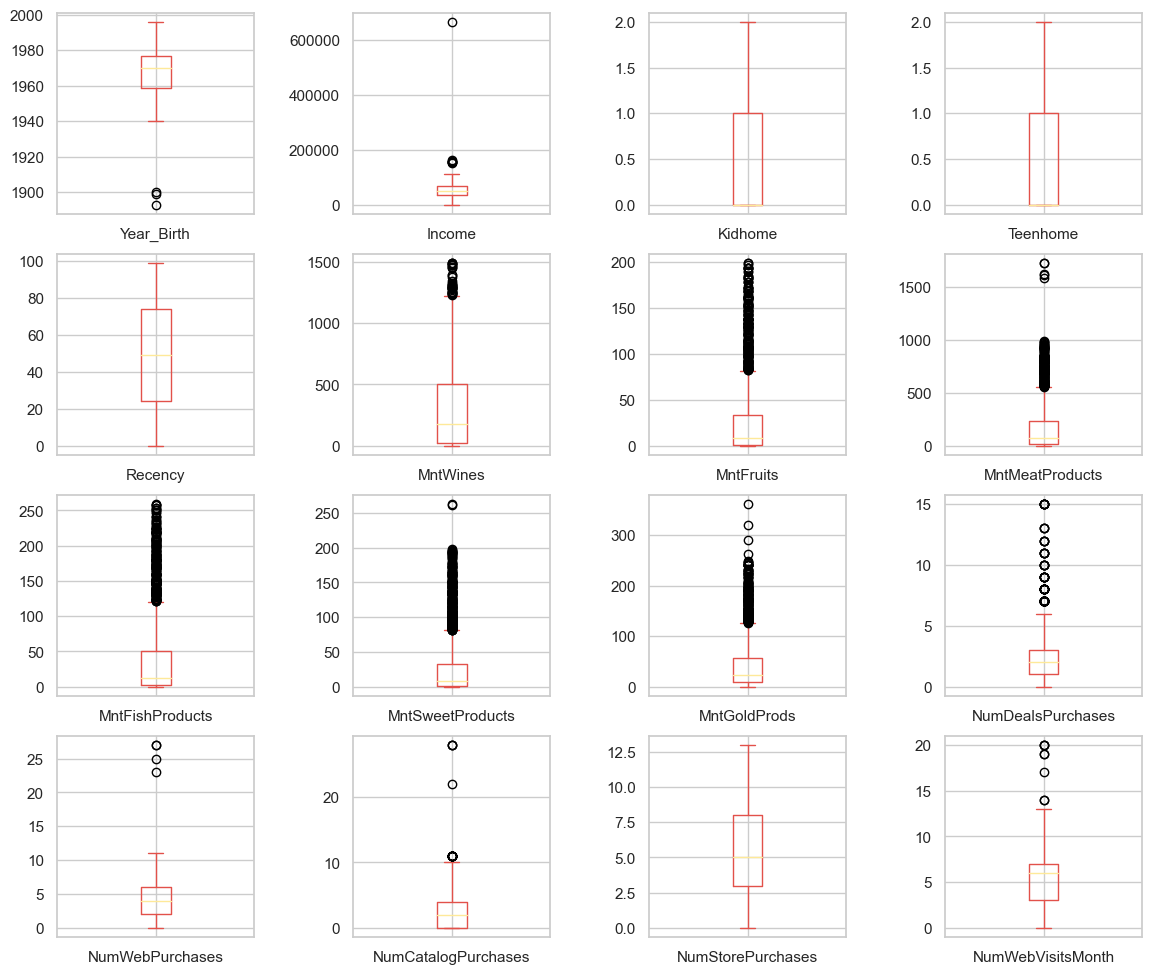

In [16]:
df_to_plot.plot(subplots = True, layout=(4,4), kind='box', figsize=(14,12))
plt.subplots_adjust(wspace=0.5)

## insight
- tidak ada data yang terduplicated
- ada data yang missing value pada kolom Income
- ada data outliers pada kolom year_brith

In [17]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [18]:
df[df['Year_Birth'] <= 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND


In [19]:
df = df[df['Year_Birth']>1900].reset_index(drop=True)

In [20]:
df.shape

(2237, 28)

# Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [21]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

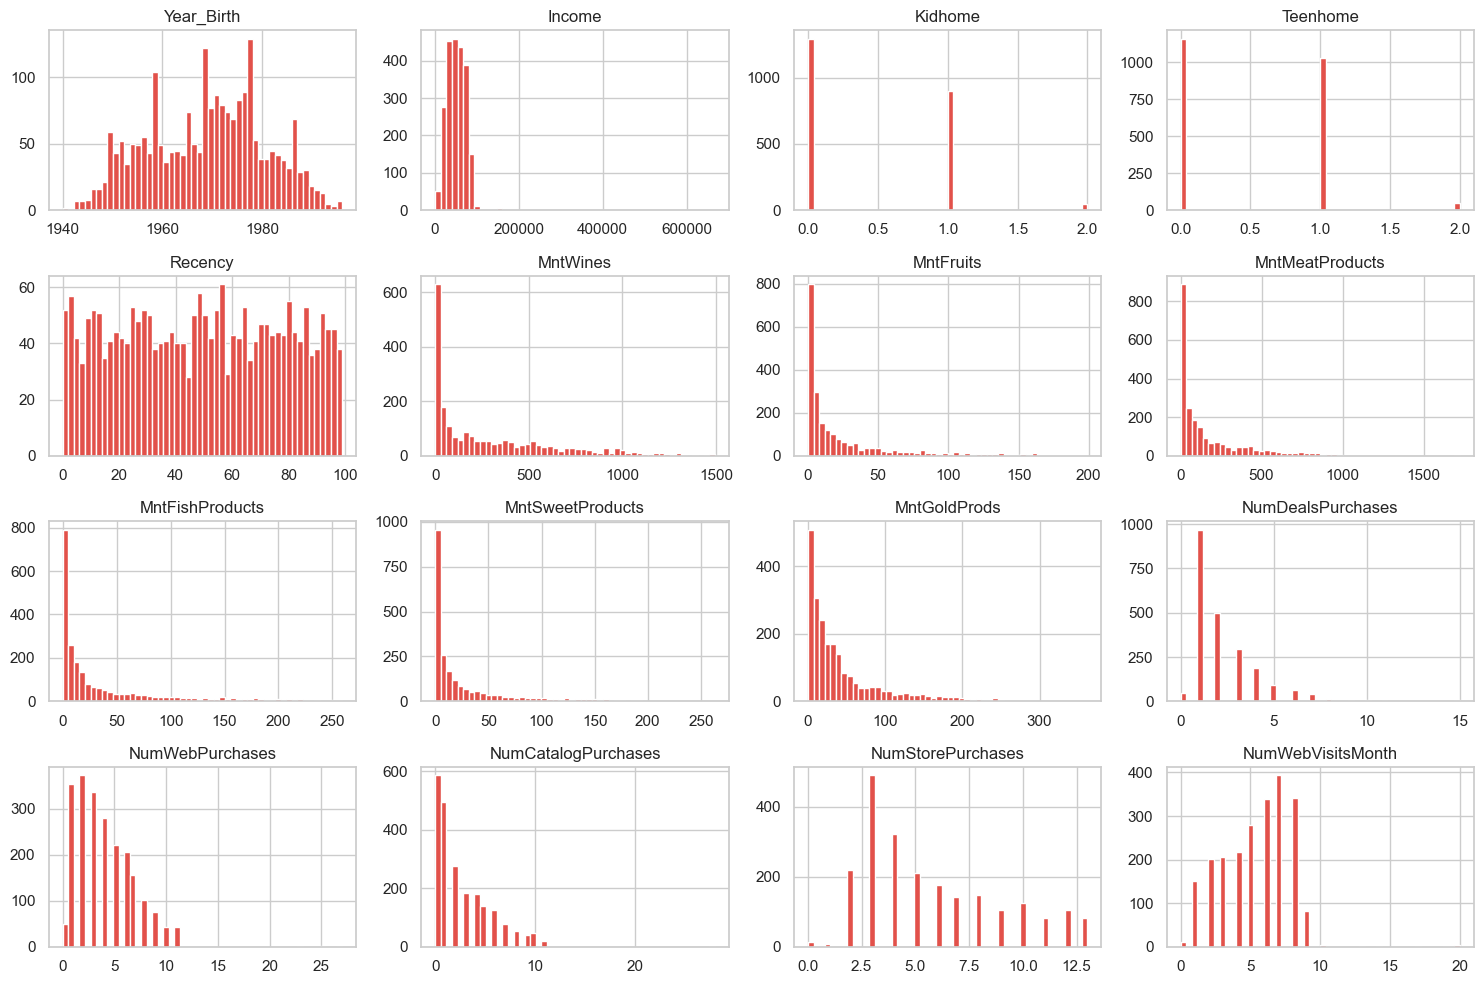

In [22]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

## insight
- data sudah berdistribusi normal tidak ada yang kurang dari 0 

# Data Insight

# Pre-processing Numeric

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


## customer age

In [24]:
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [25]:
df['Customer_Age']

0       44
1       53
2       56
3       47
4       25
        ..
2232    37
2233    36
2234    36
2235    34
2236    43
Name: Customer_Age, Length: 2237, dtype: int64

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

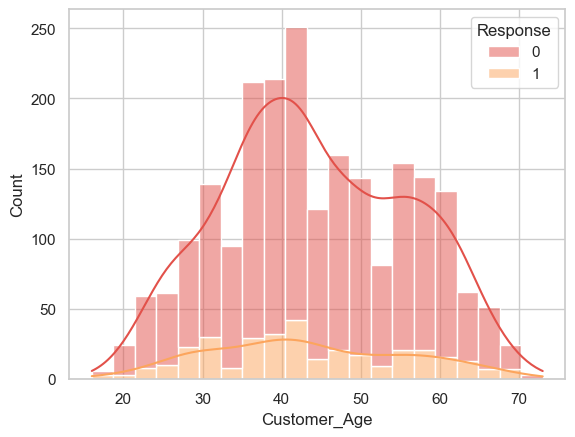

In [26]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

### insight
- distribusi umur lebih banyak di usia 40 tahun

## Education

In [27]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [28]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

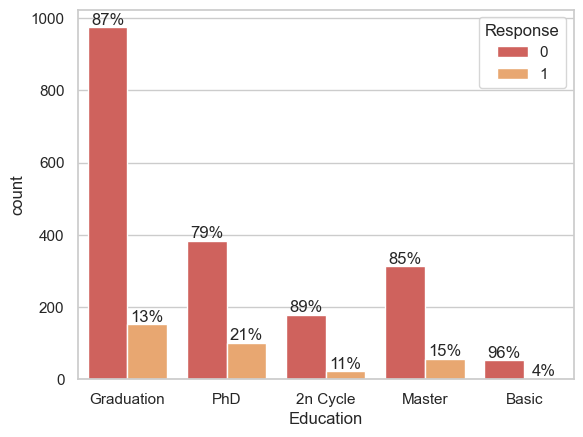

In [29]:
ax = sns.countplot(data=df, x='Education', hue='Response')
barPerc(df,'Education',ax)

### insight
- lulusan customer phd lebih banyak menerima tawaran campaign 
- lulusan customer basic lebih sedikit menerima tawaran campaign

## income by education

(0.0, 175000.0)

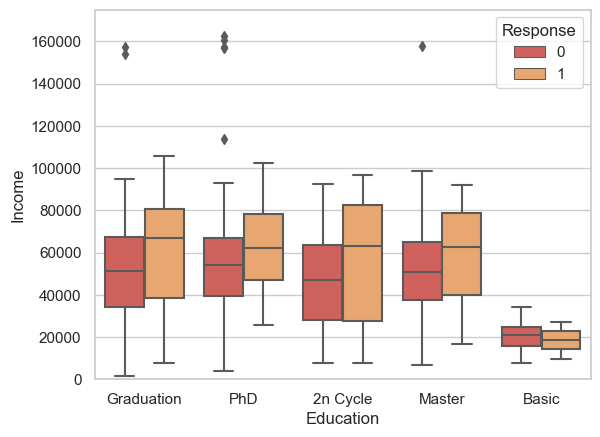

In [30]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

### insight
- income mean menerima campaign lebih tinggi dibandingkan tidak menerima campaign

## marital status

In [31]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [32]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))

In [33]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

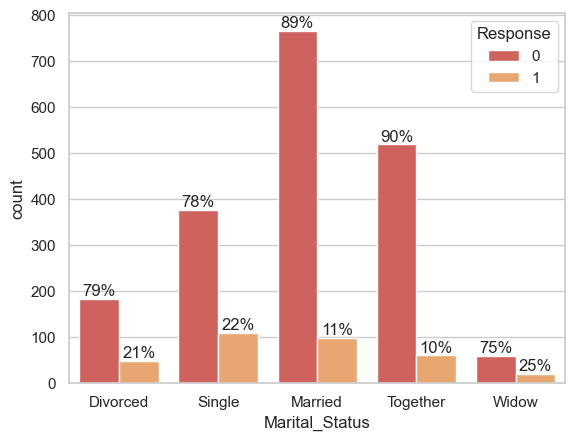

In [34]:
ax= sns.countplot(data=df, x='Marital_Status', hue='Response')
barPerc(df,'Marital_Status',ax)

### insight
- status yang sendirian lebih banyak menerima campaign. bisa saja tidak memiliki tunjangan 
- sedangkan yang berkeluarga lebih sedikit menerima campaign karenana memiliki tunjangan

## Number Dependants

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [36]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

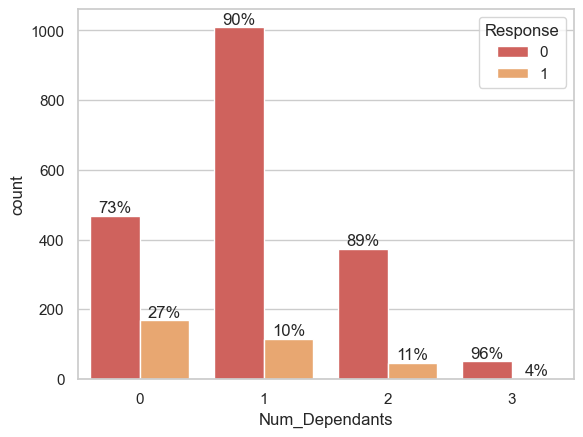

In [37]:
ax=sns.countplot(data=df, x='Num_Dependants', hue='Response')
barPerc(df,'Num_Dependants',ax)

### insight
- lebih banyak yang menerima campaign yang memiliki sedikit tanggungan atau jumlah anak 
- sedangkan yang memiliki tanggungan atau jumlah anak lebih sedikit menerima campaign

## customer join date

In [38]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

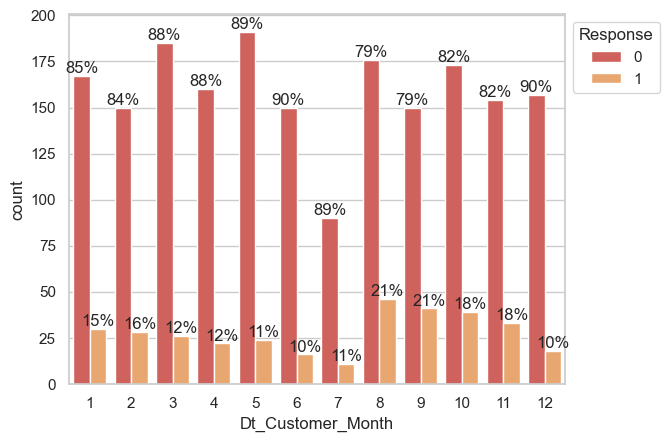

In [39]:
ax = sns.countplot(data=df, x='Dt_Customer_Month', hue='Response')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
barPerc(df,'Dt_Customer_Month',ax)

### insight
- pada bulan 8 - 11 terdapat kenaikan bagi customer yang menerima tawaran campaign

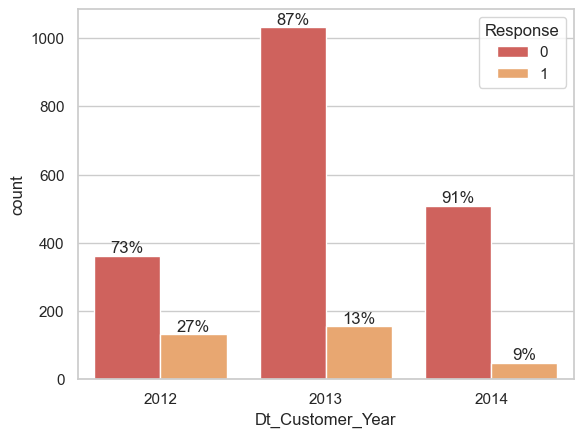

In [40]:
ax = sns.countplot(data=df, x='Dt_Customer_Year', hue='Response')
barPerc(df,'Dt_Customer_Year', ax)

### insight
- lamanya customer yang bergabung banyak yang menerima tawaran campaign

## recency

In [41]:
df['Recency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

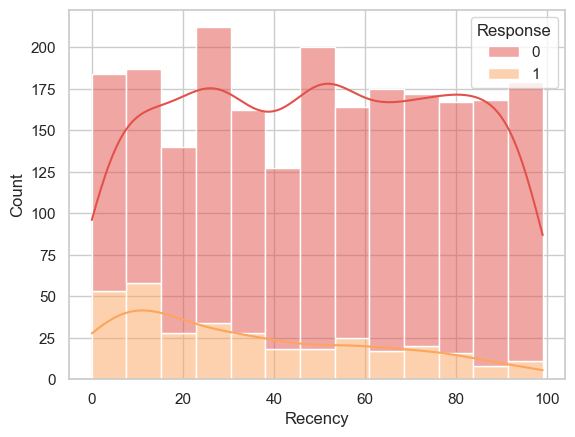

In [42]:
sns.histplot(data=df, x='Recency', hue='Response', kde=True, multiple='stack')

### insight
- customer yang belum lama membeli maka cenderung menerima tawaran campaign

## amount spent

In [43]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


In [44]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)] # namanya list comperasion
amt_spent_features.append('Response')

In [45]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


### insight
biasanya diambil diangka 60% keatas untuk correlasi tertinggi
- yang memiliki correlasi tertinggi 'MntWines', 'MntMeatProducts', 'MntGoldProds'

## total amount spent

In [46]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df['Total_Amount_Spent'] = df[amt_spent_features].sum(axis=1)

In [47]:
df['Total_Amount_Spent']

0       1190
1        577
2        251
3         11
4         91
        ... 
2232     689
2233      55
2234     309
2235    1383
2236    1078
Name: Total_Amount_Spent, Length: 2237, dtype: int64

<AxesSubplot:xlabel='Total_Amount_Spent', ylabel='Count'>

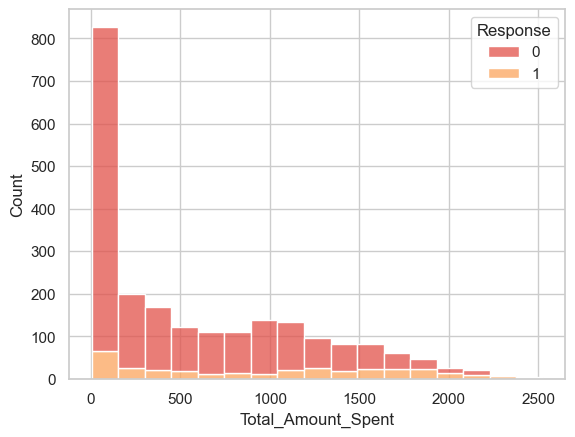

In [48]:
sns.histplot(data=df, x='Total_Amount_Spent', hue='Response', multiple='stack')

### insight
- jika customer spent money 1000-2000 maka lebih cenderung menerima tawaran campaign

## purchases

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


In [50]:
purchases_features = [c for c in df.columns if 'Purchases' in str(c)]
purchases_features.append('Response')

In [51]:
df[purchases_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


### insight
biasanya diambil diangka 60% keatas untuk correlasi tertinggi

- yang memiliki correlasi tertinggi 'NumCatalogPurchases', 'NumWebPurchases'

## total purchases

In [52]:
purchases_features = [c for c in df.columns if 'Purchases' in str(c)]
df['Total_Purchases'] = df[purchases_features].sum(axis=1)

In [53]:
df['Total_Purchases']

0       15
1       18
2       11
3        4
4        8
        ..
2232    20
2233     5
2234    14
2235    20
2236    18
Name: Total_Purchases, Length: 2237, dtype: int64

<AxesSubplot:xlabel='Total_Purchases', ylabel='Count'>

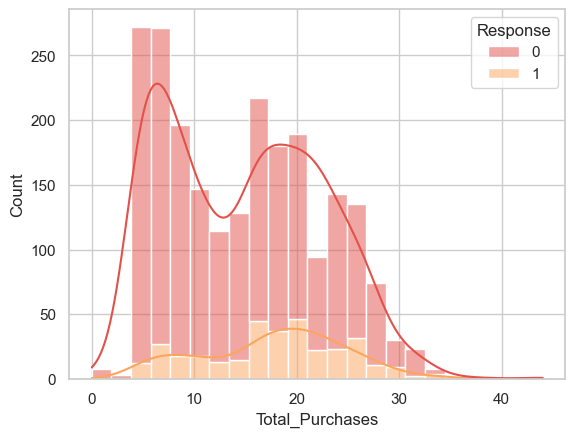

In [54]:
sns.histplot(data=df, x='Total_Purchases', hue='Response', multiple='stack', kde=True)

### insight
- distribusi 0 dan 1 hampir sama 
- tidak ada pola unik dari total pembelian 

## NumWebVisitsMonth

In [55]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


In [56]:
df[['NumWebVisitsMonth','Response']].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumWebVisitsMonth,-0.004449


### insight
- tidak ada korelasi terhadap response atau random

## previous campaign

In [57]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


In [58]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [59]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


### insight
- korelasi terttinggi 'AcceptedCmp5', 'AcceptedCmp1'

## complain

In [60]:
df['Complain'].unique()

array([0, 1])

In [61]:
df[['Complain','Response']].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
Complain,0.000185


### insight
- tidak ada korelasi pada kolom 'complain'

## country

In [62]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

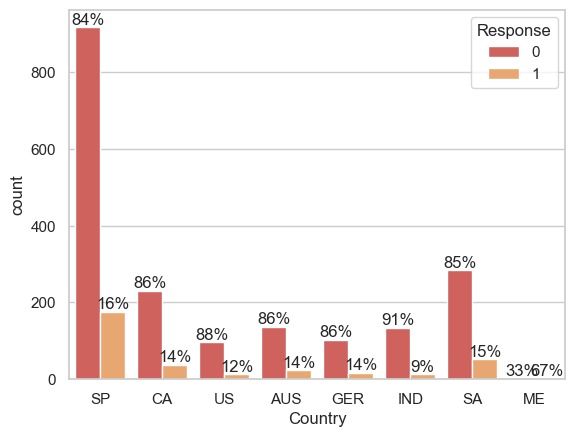

In [63]:
ax = sns.countplot(data=df, x='Country', hue='Response')
barPerc(df,'Country',ax)

### Data Insight
- ME dan SP adalah negara yang cenderung menerima penawaran campaign

In [64]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2232    66476.0
2233    31056.0
2234    46310.0
2235    65819.0
2236    94871.0
Name: Income, Length: 2237, dtype: float64

## income

<AxesSubplot:xlabel='Income', ylabel='Count'>

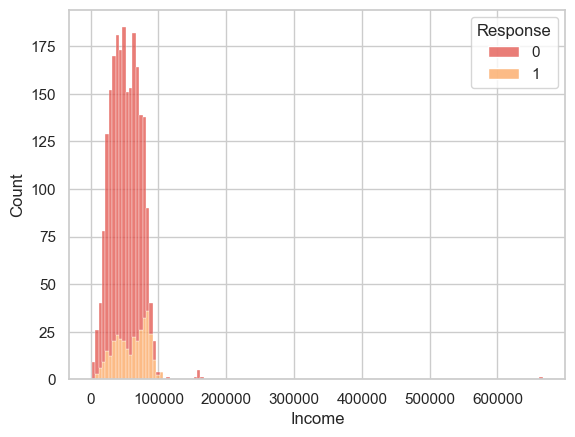

In [65]:
sns.histplot(data=df, x='Income', hue='Response', multiple='stack')

### insight
- customer yang memiliki income lebih cenderung menerima penawaran campaign produk baru

# Product Mana Saja yang Sukses Laku Terjual 

In [66]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,37,1,3,2013,689,20
2233,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,36,1,1,2013,55,5
2234,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,36,1,12,2012,309,14
2235,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,34,0,11,2012,1383,20


In [67]:
product_feature = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']
total_product=df[product_feature].sum().sort_values(ascending=False)
total_product = pd.DataFrame(total_product, columns=['Jumlah'])
total_product

,Jumlah
MntWines,680038
MntMeatProducts,373393
MntFishProducts,83939
MntSweetProducts,60553
MntFruits,58767


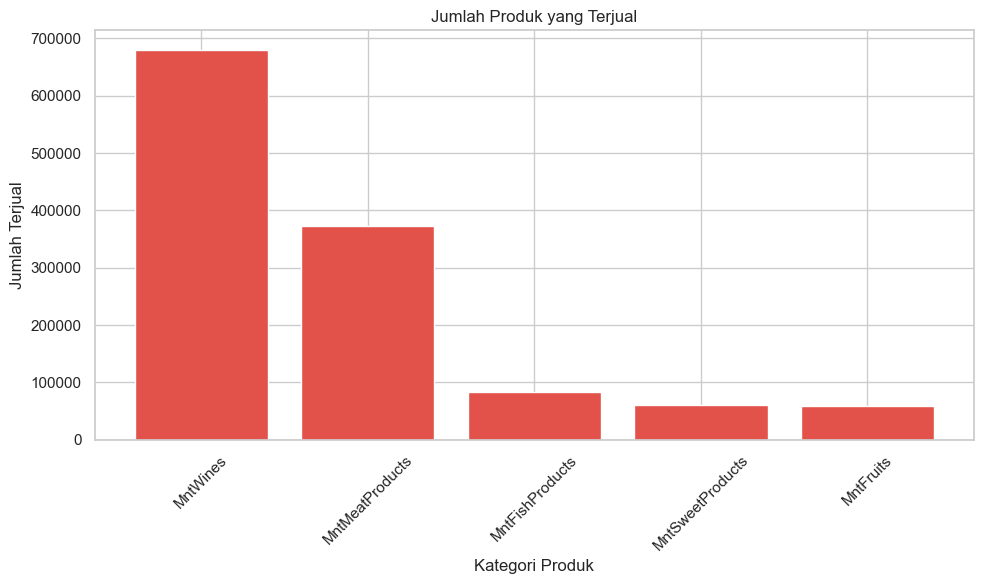

In [68]:
# Data dalam bentuk dictionary
data = {
    'Jumlah': [680038, 373393, 83939, 60553, 58767]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data, index=['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntFruits'])

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Jumlah'])
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Terjual')
plt.title('Jumlah Produk yang Terjual')
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

## modeling

## Data Splitting
- data train = 60%
- data validation = 20%
- data test = 20%

In [69]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [72]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

In [73]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

## Pre-processing Numeric

In [74]:
df_train.columns = df_train.columns.str.replace(' ','')
df_valid.columns = df_valid.columns.str.replace(' ','')
df_test.columns = df_test.columns.str.replace(' ','')

In [75]:
df_train['Income'] = df_train['Income'].str.replace('$','')
df_train['Income'] = df_train['Income'].str.replace(',','')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$','')
df_valid['Income'] = df_valid['Income'].str.replace(',','')
df_valid['Income'] = df_valid['Income'].astype('float')

df_test['Income'] = df_test['Income'].str.replace('$','')
df_test['Income'] = df_test['Income'].str.replace(',','')
df_test['Income'] = df_test['Income'].astype('float')

In [76]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])
df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [77]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

In [78]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

In [79]:
df_train['Customer_Age'] = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age'] = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age'] = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

In [80]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO','Alone','Absurd'] else str(x)) 

In [81]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

In [82]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

In [83]:
amt_spent_features = [c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

In [84]:
purchase_features = [c for c in df.columns if 'Purchases' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_features].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_features].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_features].sum(axis=1)

In [85]:
display(df_train.head(3))
print()
display(df_valid.head(3))
print()
display(df_test.head(3))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10


In [86]:
cmp_features = [c for c in df.columns if "AcceptedCmp" in str(c)]
mnt_features = [c for c in df.columns if "Mnt" in str(c)]
num_features = [c for c in df.columns if 'Num' in str(c)]

In [87]:
numeric_feature = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year', 
                'TotalAmount_Spent', 'Total_Purchases']

In [88]:
all_numeric_features = cmp_features + mnt_features + num_features + numeric_feature

In [89]:
display(df_train[all_numeric_features].head(3))
display(df_valid[all_numeric_features].head(3))
display(df_test[all_numeric_features].head(3))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8
2,0,0,0,0,0,60,51,87,6,20,51,2,4,2,4,5,51766.0,1,0,74,0,34,1,3,2014,275,12


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14
2,0,0,0,0,0,108,1,28,13,1,4,2,3,1,4,8,31497.0,0,1,22,0,50,1,12,2012,155,10


# Pre-processing Catagorical

In [90]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


In [91]:
categorical_features = ['Education', 'Marital_Status', 'Country']

## insight data categorical
- kolom Education: data yang ordinal
- kolom Marital_Status: data yang nominal (one hot encoding)
- kolom Country: data yang nominal (one hot encoding)

In [92]:
all_features = categorical_features + all_numeric_features

In [93]:
df_train_final = df_train[all_features]
df_valid_final = df_valid[all_features]
df_test_final = df_test[all_features]

In [94]:
df_train_final['Education'].unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

In [95]:
education = {'Basic':1, 'Graduation':2, '2n Cycle':3, 'Master':4, 'PhD':5}

In [96]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

In [97]:
df_train_final.head(3)

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6


## one hot encoding
- kolom Marital_Status
- kolom Country

In [98]:
from sklearn.feature_extraction import DictVectorizer

In [99]:
dv = DictVectorizer(sparse=False)

In [100]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

### kita akan melakukan one hot encoding tanpa kita pisahkan kolomnya. karna DictVectorizer sudah paham mana yang akan di transform 

pada tahap ini kita akan merubah menjadi bentuk dictionary

In [101]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

#### insight 
- fit_transform dilakukan hanya untuk data latih karena digunakan untuk menghitung dan menyimpan parameter statistik dari data latih
- transform dilakukan hanya untuk data valid dan data test karena digunakan metode ini hanya melakukan transformasi berdasarkan parameter statistik yang telah dihitung sebelumnya menggunakan data latih.

kita akan merubah kebentuk Dataframe

In [102]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names())
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names())

In [103]:
display(df_train_final.head(3))
display(df_valid_final.head(3))
display(df_test_final.head(3))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,4.0,2014.0,5.0,71466.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,12.0,0.0,546.0,182.0,412.0,4.0,1.0,10.0,4.0,1.0,0.0,86.0,0.0,1230.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,11.0,2012.0,2.0,63684.0,0.0,0.0,1.0,0.0,0.0,0.0,208.0,80.0,80.0,428.0,93.0,575.0,4.0,3.0,8.0,8.0,5.0,1.0,61.0,1.0,1464.0,23.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,12.0,2013.0,4.0,38961.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,24.0,19.0,1.0,19.0,1.0,1.0,2.0,2.0,7.0,1.0,60.0,0.0,70.0,6.0


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.0,11.0,2013.0,3.0,74805.0,0.0,0.0,0.0,0.0,1.0,0.0,41.0,162.0,37.0,209.0,162.0,209.0,7.0,5.0,10.0,4.0,2.0,1.0,14.0,1.0,820.0,26.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,5.0,2014.0,5.0,32892.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,15.0,1.0,26.0,0.0,2.0,3.0,3.0,8.0,1.0,78.0,0.0,46.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,3.0,2014.0,2.0,51766.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,51.0,51.0,87.0,20.0,60.0,2.0,2.0,4.0,4.0,5.0,1.0,74.0,0.0,275.0,12.0


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,9.0,2012.0,2.0,66731.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,159.0,141.0,194.0,106.0,371.0,3.0,4.0,6.0,4.0,3.0,1.0,33.0,1.0,1029.0,17.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,46.0,11.0,2012.0,5.0,69063.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,35.0,26.0,124.0,8.0,666.0,3.0,1.0,5.0,5.0,3.0,1.0,16.0,1.0,928.0,14.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,12.0,2012.0,5.0,31497.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,1.0,4.0,28.0,1.0,108.0,1.0,2.0,4.0,3.0,8.0,1.0,22.0,1.0,155.0,10.0


## Modelling

### dimodelin kita perlu dua variable
- x = independent variable
- y = dependent variable (target variable) --> Response

### response
- 1 = menerima campaign
- 0 = tidak meneria campaign

In [104]:
x_train_final = df_train_final
x_valid_final = df_valid_final
x_test_final = df_test_final

In [105]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Model

### Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
model = LogisticRegression(random_state=1)
model.fit(x_train_final, y_train_final)

LogisticRegression(random_state=1)

In [109]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [110]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.747


#### insight 
- pada penggunaan model Logistic Regression didapatkan nilai akurasinya 74%. ini tandanya model belum begitu baik dalam menentukan parameter mana saja yang berpengaruh pada customer untuk menerima campaign 

### RandomForest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
from sklearn.metrics import roc_auc_score

ROC AUC memberikan gambaran tentang seberapa baik model dapat memisahkan kelas dengan benar dan tidak terpengaruh oleh ketidakseimbangan kelas. Semakin tinggi nilai ROC AUC, semakin baik kemampuan model dalam membedakan kelas positif dan negatif.

In [113]:
model = RandomForestClassifier(random_state=1)
model.fit(x_train_final, y_train_final)

RandomForestClassifier(random_state=1)

In [114]:
y_valid_pred2 = model.predict_proba(x_valid_final)

In [115]:
y_valid_pred1 = model.predict(x_valid_final)

#### insight
nilai probabilitas ini menunjukkan nilai 0 (kelas negatif) yang kiri dan nilai 1 (kelas positif) yang kanan berdasarkan perbarisnya

In [116]:
y_valid_pred[:10]

array([0.17242284, 0.03288883, 0.04543728, 0.05161874, 0.30328135,
       0.05650803, 0.57516478, 0.1323791 , 0.10958434, 0.14229396])

In [117]:
y_valid_pred1[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [118]:
y_valid_pred = model.predict_proba(x_valid_final)[:,1]

In [119]:
x_valid_final

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.0,11.0,2013.0,3.0,74805.0,0.0,0.0,0.0,0.0,1.0,0.0,41.0,162.0,37.0,209.0,162.0,209.0,7.0,5.0,10.0,4.0,2.0,1.0,14.0,1.0,820.0,26.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,5.0,2014.0,5.0,32892.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,15.0,1.0,26.0,0.0,2.0,3.0,3.0,8.0,1.0,78.0,0.0,46.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,3.0,2014.0,2.0,51766.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,51.0,51.0,87.0,20.0,60.0,2.0,2.0,4.0,4.0,5.0,1.0,74.0,0.0,275.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,8.0,2012.0,2.0,23763.0,1.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,6.0,6.0,2.0,22.0,0.0,1.0,3.0,1.0,7.0,1.0,64.0,0.0,42.0,5.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,4.0,2014.0,2.0,92910.0,0.0,0.0,1.0,0.0,0.0,0.0,179.0,137.0,33.0,792.0,103.0,551.0,7.0,1.0,13.0,6.0,1.0,0.0,42.0,0.0,1795.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0,4.0,2014.0,2.0,85072.0,0.0,0.0,0.0,1.0,0.0,0.0,194.0,92.0,241.0,391.0,11.0,494.0,4.0,1.0,10.0,3.0,0.0,0.0,94.0,0.0,1423.0,18.0
443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,3.0,2013.0,2.0,30507.0,0.0,0.0,0.0,0.0,1.0,0.0,38.0,36.0,110.0,74.0,20.0,65.0,1.0,1.0,4.0,5.0,7.0,0.0,29.0,0.0,343.0,11.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,52.0,2.0,2014.0,2.0,83715.0,0.0,0.0,1.0,0.0,0.0,0.0,150.0,8.0,8.0,407.0,35.0,318.0,8.0,1.0,13.0,2.0,0.0,0.0,2.0,0.0,926.0,24.0
445,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,9.0,2012.0,3.0,87305.0,0.0,1.0,0.0,0.0,0.0,0.0,63.0,25.0,80.0,501.0,138.0,345.0,3.0,1.0,8.0,5.0,2.0,0.0,19.0,0.0,1152.0,17.0


#### insight
nilai probabilitas ini adalah nilai yang diambil dari nilai 1 (kelas positif) yang menunjukkan setiap nilainya berdasarkan perbarisnya

In [120]:
y_valid_pred[:5]

array([0.11, 0.01, 0.04, 0.03, 0.66])

In [121]:
print('RandomForest ROCAUC Result:', roc_auc_score(y_valid_final, y_valid_pred))

RandomForest ROCAUC Result: 0.874728151429722


#### insight
- pada penggunaan model RandomForest didapatkan nilai akurasinya 87%. ini tandanya model sudah sangat baik dalam menentukan parameter mana saja yang berpengaruh pada customer untuk menerima campaign

tahapan selanjunya adalah hyper meter parameter tunning, tapi kita tidak melakukannya karena itu bagian dari data science. kita hanya mencari parameter saja yang mempengaruhi customer menerima campaign kita

## Performance Stability Check

setelah kita melakukan validation, maka kita akan menguji dengan data baru yang sudah kita buat di df_test_final. jika nilai akurasi validation jauh berbeda dengan data baru yang akan kita test maka  model kita tidak stabil

In [122]:
x_full_train_final = pd.concat([x_train_final, x_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

In [123]:
model = RandomForestClassifier(random_state=1)
model.fit(x_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=1)

In [124]:
y_test_pred = model.predict_proba(x_test_final)[:,1]
print('RandomForest ROCAUC Result:', roc_auc_score(y_test_final, y_test_pred))

RandomForest ROCAUC Result: 0.8750789750789751


In [125]:
y_test_pred4 = model.predict_proba(x_test_final)

### insight
- sebagai panduan umum, jika selisih antara akurasi data latih dan akurasi data validasi atau test sangat besar, misalnya lebih dari 10% atau 15%, itu bisa menjadi indikasi adanya overfitting. Selisih yang besar tersebut menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.


## Interpretation
Shapley Values adalah cara untuk mengetahui seberapa besar kontribusi setiap fitur dalam menentukan prediksi mesin tersebut.kita bisa tahu betapa pentingnya masing-masing informasi dalam pengambilan keputusan mesin prediksi Ini membantu kita memahami alasan di balik prediksi mesin dan memastikan bahwa hasilnya bisa dipercaya dan dipahami dengan baik.

In [126]:
import shap

In [127]:
# karna model kita RandomForest maka pakai 'Tree'
explainer = shap.TreeExplainer(model)
shape_values = explainer.shap_values(x_test_final)

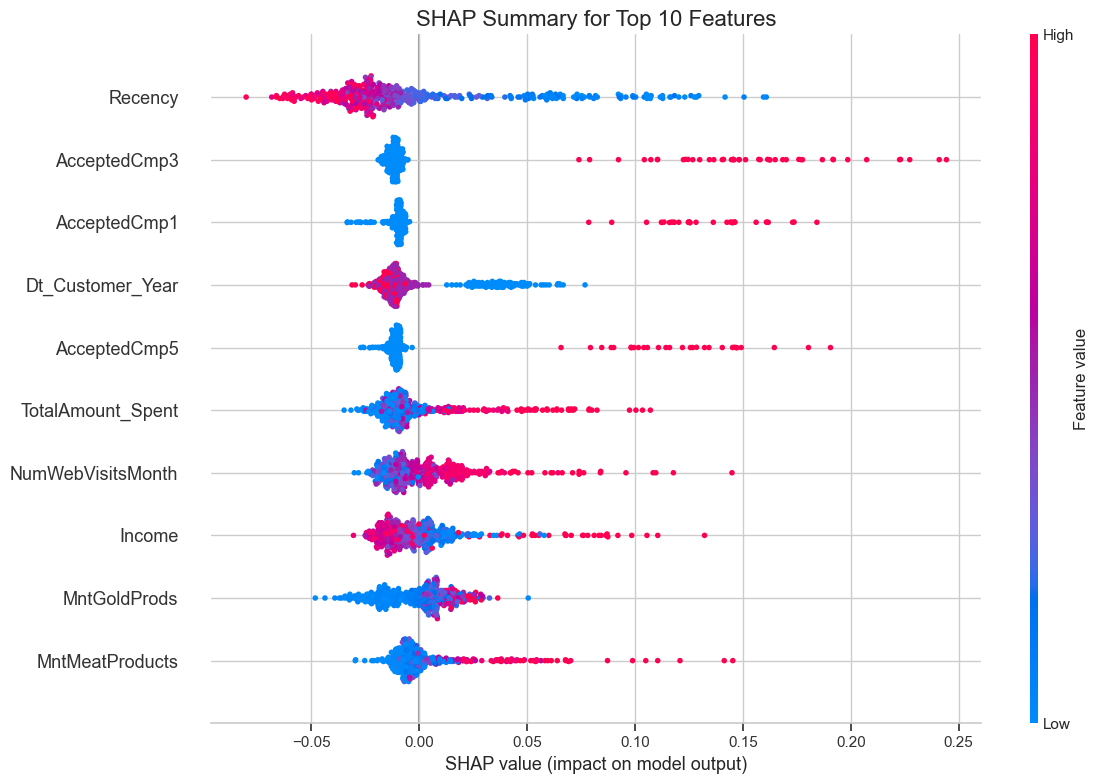

In [128]:
#plot
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shape_values[1], x_test_final, max_display=10, plot_size=[12,8])

# mengimport model dalam bentuk file csv

In [129]:
df_prediction_model = pd.DataFrame(y_test_pred4, columns=['Prob_0','Prob_1'])
dfx = pd.concat([df, df_prediction_model], axis=1)

#dfx.to_excel('Model_Campaign_Marketing.xlsx')

dfx.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Prob_0,Prob_1
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0.940,0.060
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0.925,0.075
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,0.940,0.060
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,0.970,0.030
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,0.845,0.155
